In [11]:
# import mtlchmm
import rasterio
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import fiona
from rasterio.mask import mask

%matplotlib inline


In [3]:
def read_file(file):
    with rasterio.open(file) as src:
        return (src.read(1))

In [3]:
hmm_model = mtlchmm.MTLCHMM(method='forward-backward', 
                             transition_prior=0.1,
                             block_size=192,
                             n_jobs=1,
                             tiled=True,
                             blockxsize=192,
                             blockysize=192,
                             compress='lzw',
                            out_dir=r'E:\acocac\research\c4\tile_0_201\eval\test')

In [4]:
indir = r'E:\acocac\research\c4\tile_0_201\eval\pred\1_dataset\ep30\convgru\convgru64_15_fold0_MCD12Q1v6stable_LCProp2_42497'

In [5]:
file_list = glob.glob(os.path.join(indir,'{}/confidences/*/*.tif'.format(2001)))

In [7]:
with rasterio.open(file_list[0]) as src:
    profile = src.profile

In [8]:
out_profile = profile

out_profile.update({
        'dtype':rasterio.float32,
        'count':array_stack.shape[0],
        'height': array_stack.shape[1],
        'width': array_stack.shape[2],
        'compress':'lzw'})

NameError: name 'array_stack' is not defined

In [49]:
# year = 2001
for year in range(2001,2019):
    file_list = glob.glob(os.path.join(indir,'{}/confidences/*/*.tif'.format(year)))
    file_list = sorted(file_list, key=lambda x: int(os.path.basename(os.path.dirname(x)).partition('_')[ 0 ]))

    array_list = [read_file(x) for x in file_list ]
    array_stack = np.stack(array_list)  # stack
    
    with rasterio.open(os.path.join(indir,'{}.tif'.format(year)), 'w', **out_profile) as dest:
        dest.write(array_stack)

In [44]:
array_stack.shape

(11, 384, 384)

In [46]:
with rasterio.open(os.path.join(indir,'2001.tif'), 'w', **out_profile) as dest:
    dest.write(array_stack)

In [39]:
indir_lcc = r'F:\acoca\research\gee\dataset\AMZ\prediction\confidences_stack'
lc_probabilities = glob.glob(os.path.join(indir_lcc,'*.tif'))
# file_list = sorted(file_list, key=lambda x: int(os.path.basename(os.path.dirname(x)).partition('_')[ 0 ]))

In [40]:
lc_probabilities

['F:\\acoca\\research\\gee\\dataset\\AMZ\\prediction\\confidences_stack\\2001.tif',
 'F:\\acoca\\research\\gee\\dataset\\AMZ\\prediction\\confidences_stack\\2002.tif']

In [6]:
hmm_model.fit_predict(lc_probabilities[0:2])

[[2.5637625e-09 4.2189836e-08 6.6393397e-07 1.7250274e-07 1.8366819e-41
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]


NameError: name 'forward' is not defined

In [4]:
with rasterio.open(lc_probabilities[0]) as src:
                bands = src.count

NameError: name 'lc_probabilities' is not defined

In [78]:
with rio.open(self.lc_probabilities[0]) as src:

        name_info = RInfo(dtype=dtype,
                               bands=bands,
                               crs=src.crs,
                               transform=Affine.from_gdal(*src.read_transform()))

11

In [79]:
d_name, f_name = os.path.split(lc_probabilities[0])
f_base, f_ext = os.path.splitext(f_name)

# out_name = os.path.join(self.out_dir, '{}_hmm{}'.format(f_base, f_ext))

In [80]:
f_base

'2001'

In [1]:
a = r"F:\acoca\research\gee\dataset\AMZ\prediction\confidences_stack\2001.tif"

In [5]:
with rasterio.open(a) as src:
    profile = src.profile

In [6]:
out_profile = profile

# out_profile.update({
#         'dtype':rasterio.float32,
#         'count':array_stack.shape[0],
#         'height': array_stack.shape[1],
#         'width': array_stack.shape[2],
#         'compress':'lzw'})

In [7]:
out_profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 16896, 'height': 13440, 'count': 8, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.002083333300000024, 0.0, -79.48333320616001,
       0.0, -0.002083333300000024, 10.06666665056), 'blockxsize': 384, 'blockysize': 384, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

In [22]:
def read_file(file):
    with rasterio.open(file) as src:
        print(src.count)
        return (src.read(2))

In [8]:
src = rasterio.open(a)


In [ ]:
red = src.read(5)


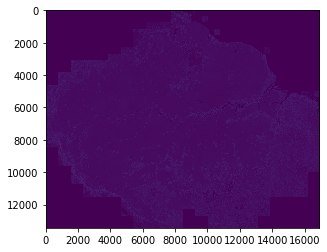

In [10]:
plt.imshow(src.read(1), vmin=0, vmax=1)

In [25]:
corrupt = r'F:\acoca\research\gee\dataset\AMZ\trajectories\_ep15\2001.tif'

In [26]:
src = rasterio.open(corrupt)


In [22]:
np.max(src.read(1))

255

In [7]:
def read_file_lc(raster, shape):
    with rasterio.open(raster) as src:
        out_image, out_transform = mask(src, shape, crop=True, invert=False, all_touched=False)
        return out_image

In [12]:
indir = r'E:\acocac\research\AMZ\trajectories\geodata\postyear\input'
file_list = glob.glob(os.path.join(indir,'entropyP*.tif'))
# file_list = sorted(file_list, key=lambda x: int(os.path.basename(os.path.dirname(x)).partition('_')[ 0 ]))

# aux files
auxdir = r'F:\acoca\research\gee\dataset\AMZ\implementation'
aoi_file = os.path.join(auxdir,'aoi','aoi_bigger.shp')
terrai_file = os.path.join(auxdir,'terrai','AMZ_decrease_2004_01_01_to_2019_06_10.tif')

# read files
with fiona.open(aoi_file, "r") as shapefile:
    aoi = [feature["geometry"] for feature in shapefile]


array_list = [read_file_lc(x, aoi) for x in file_list ]
array_stack = np.stack(array_list)  # stack

In [14]:
array_stack = array_stack.reshape(array_stack.shape[0]*array_stack.shape[1],array_stack.shape[2],array_stack.shape[3])

In [25]:
array_stack2 = np.max(array_stack, axis=0)

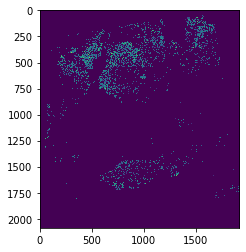

In [27]:
plt.imshow(array_stack2, vmin=0, vmax=1)

In [30]:
with rasterio.open(file_list[0]) as src:
    profile = src.profile

out_profile = profile

out_profile.update({
    'dtype': rasterio.float32,
    'height': array_stack2.shape[0],
    'width': array_stack2.shape[1],
    'compress': 'lzw'})

with rasterio.open(r'E:\acocac\research\AMZ\trajectories\geodata\postyear\test.tif', 'w',
                   **out_profile) as dest:
    dest.write(array_stack2, 1)